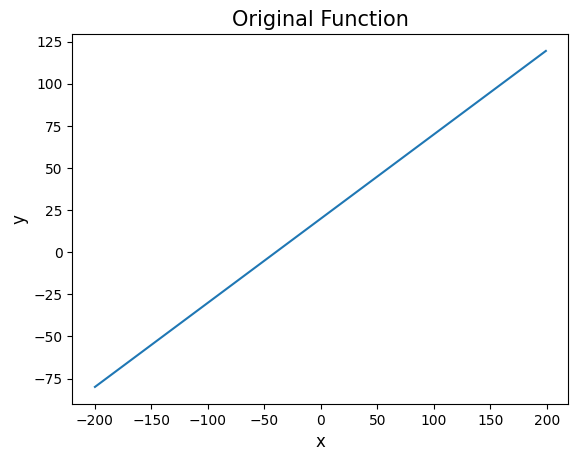

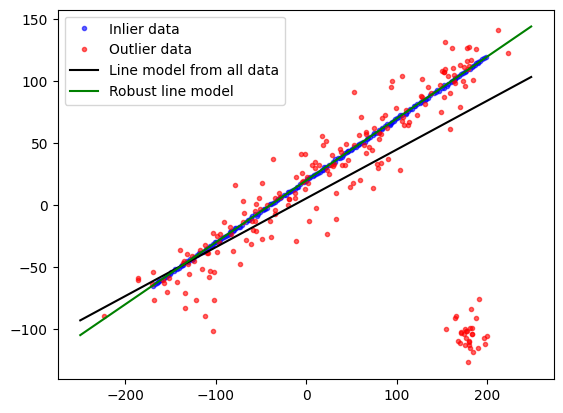

In [17]:
import numpy as np
from skimage.measure import LineModelND
import matplotlib.pyplot as plt
N = 100
a = 2
b = 3
x = np.arange(1, N+1, 1)
y = a * x + b

# generate some noise
# noise = 20 * np.random.normal(size=x.size)
noise = 20 * np.random.normal(0, 50, size=x.size)
y_noise = noise + y

In [ ]:
nd_model = LineModelND()
data = np.column_stack((x,y_noise))
nd_model.estimate(data)
ans_x = np.arange(-10, N+50, 1)
ans_y = nd_model.predict_y(ans_x)
plt.plot(x, y_noise, '.')
plt.plot(ans_x, ans_y, 'r-', label='')